In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 80
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.libqsturng as slb
import statsmodels.stats.outliers_influence as sso
import statsmodels
import statistics
import math

In [3]:
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res, ddof=1)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

In [4]:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

In [5]:
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

## Salaries v.s. Position

In [5]:
position_salary_data = pd.read_csv('performance_with_salary.csv')
position_salary_data = position_salary_data[['Player', 'Pos', '2023-24_Salary']]
display(position_salary_data)

,Player,Pos,2023-24_Salary
0,Stephen Curry,PG,51915615
1,Kevin Durant,PF,47649433
2,Joel Embiid,C,47607350
3,LeBron James,PF,47607350
4,Bradley Beal,SG,46741590
...,...,...,...
489,Jalen Crutcher,PG,64343
490,Izaiah Brockington,PG,64343
491,Timmy Allen,SF,64343
492,Kaiser Gates,SF,35389


array([[<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'PF'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'SF'}>],
       [<AxesSubplot:title={'center':'SG'}>, <AxesSubplot:>]],
      dtype=object)

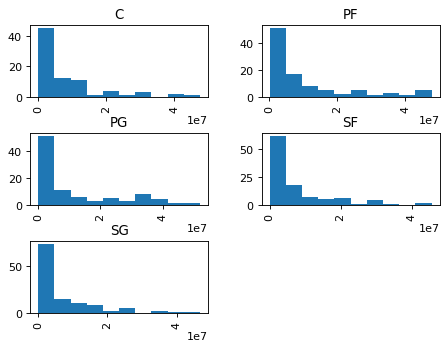

In [6]:
position_salary_data['2023-24_Salary'].hist(by=position_salary_data['Pos'])

Text(0.5, 1.0, 'Q-Q Plot for Salaries (SG)')

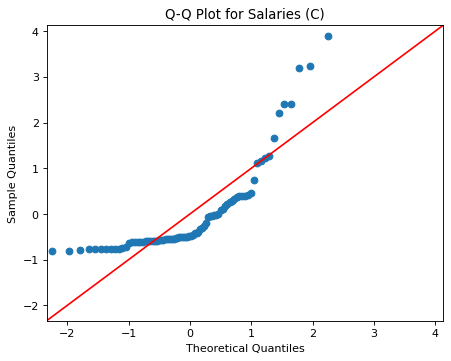

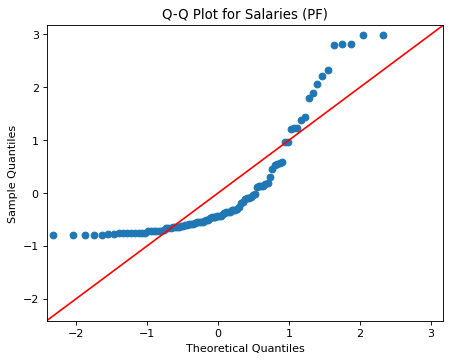

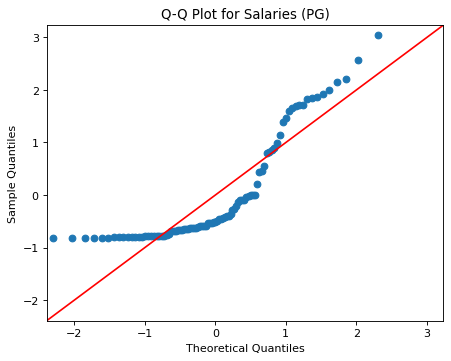

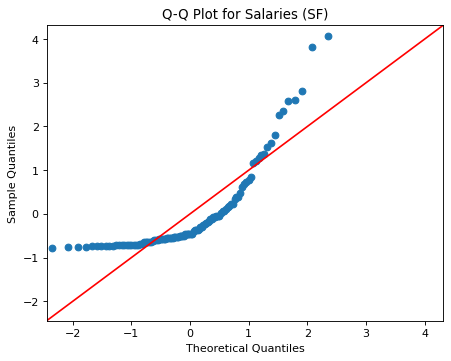

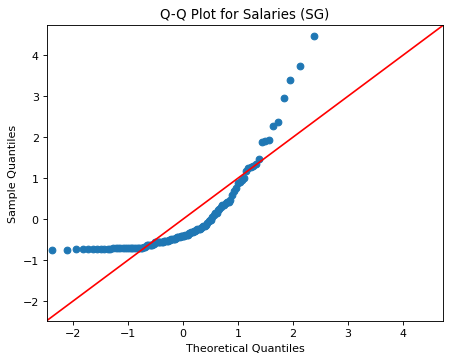

In [7]:
fig = sm.qqplot(position_salary_data['2023-24_Salary'][position_salary_data['Pos'] == 'C'], stats.norm, fit=True, line='45')
plt.title('Q-Q Plot for Salaries (C)')

fig = sm.qqplot(position_salary_data['2023-24_Salary'][position_salary_data['Pos'] == 'PF'], stats.norm, fit=True, line='45')
plt.title('Q-Q Plot for Salaries (PF)')

fig = sm.qqplot(position_salary_data['2023-24_Salary'][position_salary_data['Pos'] == 'PG'], stats.norm, fit=True, line='45')
plt.title('Q-Q Plot for Salaries (PG)')

fig = sm.qqplot(position_salary_data['2023-24_Salary'][position_salary_data['Pos'] == 'SF'], stats.norm, fit=True, line='45')
plt.title('Q-Q Plot for Salaries (SF)')

fig = sm.qqplot(position_salary_data['2023-24_Salary'][position_salary_data['Pos'] == 'SG'], stats.norm, fit=True, line='45')
plt.title('Q-Q Plot for Salaries (SG)')

In [8]:
position_salary_data_group_summary = position_salary_data.groupby(['Pos']).describe()
display(position_salary_data_group_summary)

2023-24_Salary                                                    \
             count          mean           std       min         25%   
Pos                                                                    
C             80.0  8.215342e+06  1.017385e+07   26322.0  2198780.00   
PF            98.0  1.013708e+07  1.262323e+07  124425.0  1925912.25   
PG            93.0  1.106805e+07  1.350173e+07   64343.0  1165280.00   
SF           106.0  7.277381e+06  9.456515e+06   35389.0  1204617.75   
SG           117.0  6.786164e+06  8.971294e+06   70687.0  1098242.00   

                                         
           50%          75%         max  
Pos                                      
C    3402444.5  10949999.75  47607350.0  
PF   4737151.0  12241250.00  47649433.0  
PG   4171548.0  17307693.00  51915615.0  
SF   3000000.0   8892916.50  45640084.0  
SG   3196448.0   8925000.00  46741590.0

In [9]:
stat_0, p_0 = stats.shapiro(position_salary_data['2023-24_Salary'][position_salary_data['Pos'] == 'C'])
print('For Pos = C')
print(f"Shapiro statistic = {stat_0:.6f} and p_value = {p_0:.6f}")
stat_1, p_1 = stats.shapiro(position_salary_data['2023-24_Salary'][position_salary_data['Pos'] == 'PF'])
print('For Pos = PF')
print(f"Shapiro statistic = {stat_1:.6f} and p_value = {p_1:.6f}")
stat_2, p_2 = stats.shapiro(position_salary_data['2023-24_Salary'][position_salary_data['Pos'] == 'PG'])
print('For Pos = PG')
print(f"Shapiro statistic = {stat_2:.6f} and p_value = {p_2:.6f}")
stat_3, p_3 = stats.shapiro(position_salary_data['2023-24_Salary'][position_salary_data['Pos'] == 'SF'])
print('For Pos = SF')
print(f"Shapiro statistic = {stat_3:.6f} and p_value = {p_3:.6f}")
stat_4, p_4 = stats.shapiro(position_salary_data['2023-24_Salary'][position_salary_data['Pos'] == 'SG'])
print('For Pos = SG')
print(f"Shapiro statistic = {stat_4:.6f} and p_value = {p_4:.6f}")

For Pos = C
Shapiro statistic = 0.721105 and p_value = 0.000000
For Pos = PF
Shapiro statistic = 0.743559 and p_value = 0.000000
For Pos = PG
Shapiro statistic = 0.776440 and p_value = 0.000000
For Pos = SF
Shapiro statistic = 0.725661 and p_value = 0.000000
For Pos = SG
Shapiro statistic = 0.721697 and p_value = 0.000000


## Kruskal Wallis Test

In [10]:
def Kruskal_Wallis_Test(data): 
    col_list = data.columns.values.tolist()
    k = data.shape[1]
    ni = np.zeros(k)
    data0 = pd.DataFrame(data[col_list[0]])
    data0 = data0.dropna()
    ni[0] = data0.size
    alldata = np.array(data0)
    for i in range(1, k):
        datai = pd.DataFrame(data[col_list[i]])
        datai = datai.dropna()
        ni[i] = datai.size
        alldata = np.concatenate([alldata, datai])
    alldata_sort = np.array(alldata[:,0])
    alldata_sort.sort()
    tmpdf = pd.DataFrame(({'value': alldata_sort}))
    tmpdf['rank'] = tmpdf.index + 1
    value2rank = tmpdf.groupby('value').mean().reset_index()
    T = np.zeros(k)
    for i in range(0, k):
        samp = pd.DataFrame({'value': data[col_list[i]]})
        samp = pd.merge(samp, value2rank)
        T[i] = samp['rank'].sum()
        print(f"T{i+1:.0f} = {T[i]:.6f}")
    n = ni.sum()
    T_sum = 0
    for i in range(0, k):
        T_sum = T_sum + T[i]**2/ni[i]
    H = 12/ n / (n+1) * (T_sum) - k * (n+1)
    pvalue = 1 - stats.chi2.cdf(H, k-1)
    print(f"H = {H:.6f}")
    print(f"pvalue = {pvalue:.6f}")
    return T, H, pvalue

In [11]:
data_c = position_salary_data[position_salary_data['Pos'] == 'C']['2023-24_Salary'].dropna().reset_index(drop=True)
data_pf = position_salary_data[position_salary_data['Pos'] == 'PF']['2023-24_Salary'].dropna().reset_index(drop=True)
data_pg = position_salary_data[position_salary_data['Pos'] == 'PG']['2023-24_Salary'].dropna().reset_index(drop=True)
data_sf = position_salary_data[position_salary_data['Pos'] == 'SF']['2023-24_Salary'].dropna().reset_index(drop=True)
data_sg = position_salary_data[position_salary_data['Pos'] == 'SG']['2023-24_Salary'].dropna().reset_index(drop=True)
position_salary_data_wtl = pd.DataFrame({'C': data_c, 'PF': data_pf, 'PG': data_pg, 'SF': data_sf, 'SG': data_sg})
display(position_salary_data_wtl)

T, H, pvalue = Kruskal_Wallis_Test(position_salary_data_wtl)

,C,PF,PG,SF,SG
0,47607350.0,47649433.0,51915615.0,45640084.0,46741590
1,41000000.0,47607350.0,45640084.0,43219440.0,40064220
2,40600080.0,45640084.0,40806300.0,33833400.0,37037037
3,32600060.0,45640084.0,40064220.0,31830357.0,33162030
4,32459438.0,45183960.0,37893408.0,31500000.0,27955357
...,...,...,...,...,...
112,NaN,NaN,NaN,NaN,205897
113,NaN,NaN,NaN,NaN,160857
114,NaN,NaN,NaN,NaN,145301
115,NaN,NaN,NaN,NaN,134863


T1 = 20628.500000
T2 = 26206.000000
T3 = 24136.500000
T4 = 24838.000000
T5 = 26456.000000
H = -983.484019
pvalue = 1.000000


## Team Salary

In [23]:
team_data = pd.read_excel('us city gdp.xlsx')
display(team_data.head())

,City,GDP (billion),population (million),GDP per person,Team Salaries (milllions),Win,Revenue (million)
0,Boston,842,8.5,9906,185.6823,64,407.0
1,New York,2538,23.6,10754,160.9242,41,455.0
2,Philadelphia,601,7.4,8122,166.5278,47,377.0
3,Ontario (Toronto),800,15.4,5195,164.4861,25,347.0
4,Chicago,875,10.0,8750,165.6304,39,380.0


### Residual Analysis

In [24]:
y_data = team_data['Team Salaries (milllions)'].values
X_data_ar = np.array([team_data['GDP per person'], team_data['Win'], team_data['Revenue (million)']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['GDP per person', 'Win', 'Revenue (million)'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()

st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
y_pre = data[:, 2]
SD = data[:, 10]
print(SD)

[ 2.66448383e-01 -9.81946844e-01 -2.37586113e-01  8.75669245e-01
  4.29010080e-02  1.83030623e-03 -1.65198344e-01 -1.03288540e+00
  1.65493697e+00 -2.60657426e-01 -5.84391640e-01  5.11822783e-01
 -2.21287888e+00  1.07691347e+00  8.76822234e-01  8.36363116e-02
 -5.01132297e-01  1.25436161e+00 -1.71616866e+00  2.02103105e-01
  6.63435797e-01  2.10117774e+00 -9.98435313e-01 -1.45918605e-01
 -1.16870034e+00  1.06586719e+00  4.48568094e-01 -5.18034742e-01]


### Normality

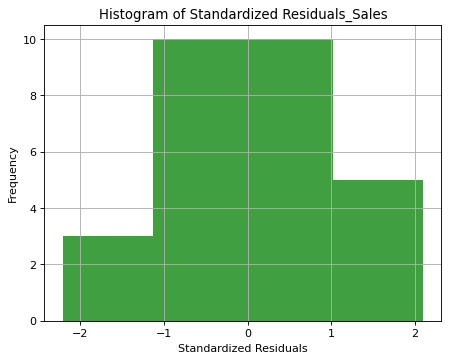

Chi-squared test: statistics = 0.2857, p-value = 0.5930
Critical value = 3.8415 (defree of freedom = 1)


In [25]:
mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 4, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Sales')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

chi2_pval = Chi_Square_for_Normality(SD, 4, 0.05) 

### Heteroscedasticity

$$
H_0: \mbox{Errors are homoscedasticity.} \\
H_1: \mbox{Errors are heteroscedasticity.}
$$

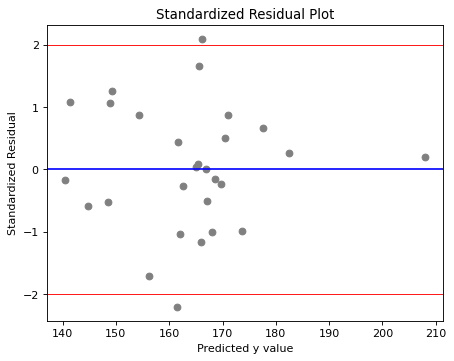

Outliers by SD = 

12   -2.212879
21    2.101178
Name: SD, dtype: float64


In [26]:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

data_sd = pd.DataFrame(SD,columns = ['SD'])
filter = (data_sd['SD'] < -2) | (data_sd['SD'] > 2)
print("Outliers by SD = \n")
print(data_sd['SD'].loc[filter])

### Influentail Observations

In [27]:
H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))
data_sd['hii'] = np.diagonal(H)
data_h = pd.DataFrame(data_sd['hii'])
k = result.df_model
n = len(data_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (data_h['hii'] > h_level )
print("Influential Observations by hi = \n")
print(data_h['hii'].loc[filter])

s2_e = result.mse_resid
y_a = data[:, 1]
y_f = data[:, 2]
h_i = data_sd['hii']
CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * h_i / np.square(1 - h_i)
CD = np.array(CD_arr)
data_cd = pd.DataFrame(CD,columns = ['CD'])
filter = (data_cd['CD'] > 1 )
print("Influential Observations by Cook's Distances = \n")
print(data_cd['CD'].loc[filter])

h_level =  0.42857142857142855
 

Influential Observations by hi = 

13    0.572372
Name: hii, dtype: float64
Influential Observations by Cook's Distances = 

Series([], Name: CD, dtype: float64)


C:\Users\User\AppData\Local\Temp\ipykernel_7976\3050334902.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))


### Dependence of the Error Variable

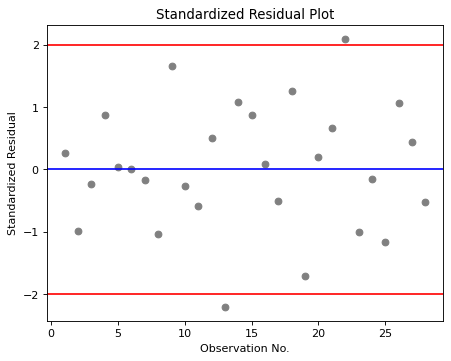

In [28]:
Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

$$
H_0: \mbox{Randomness exists.} \\
H_1: \mbox{Randomness does not exist.}
$$

In [29]:
SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

runs =  16
n1 =  14
n2 =  14
runs_exp =  15.0
stan_dev =  2.596293654566205
z =  0.38516444325982163
pval_z =  0.7001155851110985
p_value for Z-statistic=  0.7001155851110985


### Regression Diagnostics Analysis

### Multicollinearity

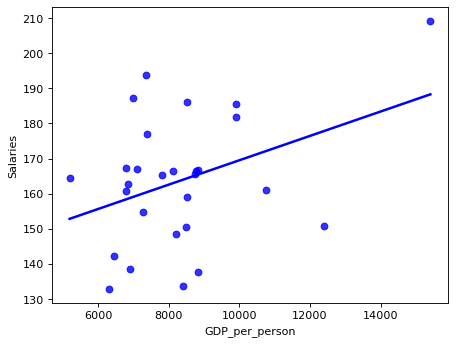

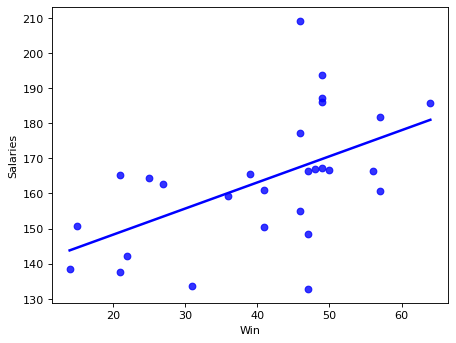

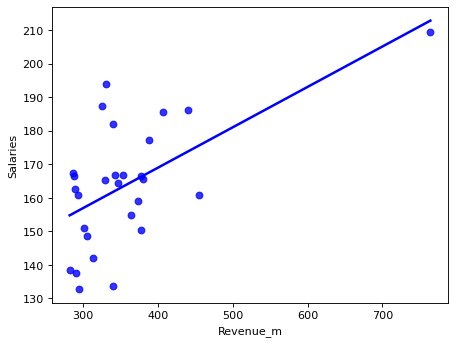

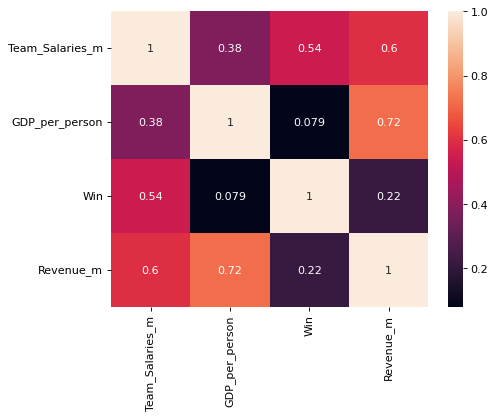

In [32]:
xnames = ['GDP_per_person', 'Win', 'Revenue_m']
for aname in xnames:
    x_var = team_data[aname].values
    _ = sns.regplot(x = x_var, y = y_data, data = team_data, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Salaries')
    plt.show()

corr = team_data[['Team_Salaries_m'] + xnames].corr()
_ = sns.heatmap(corr, annot=True)

In [31]:
team_data = team_data.rename(columns={"GDP per person": "GDP_per_person", 'Team Salaries (milllions)': 'Team_Salaries_m',
                                      'GDP (billion)': 'GDP_b', "population (million)": "population_m",
                                      'Revenue (million)': 'Revenue_m'})
result = smf.ols("Team_Salaries_m ~ GDP_per_person", data=team_data[['Team_Salaries_m', 'GDP_per_person']]).fit()
#print(result.summary())

result = smf.ols("Team_Salaries_m ~ Win", data=team_data[['Team_Salaries_m', 'Win']]).fit()
#print(result.summary())

result = smf.ols("Team_Salaries_m ~ GDP_per_person + Win + Revenue_m", data=team_data[['Team_Salaries_m', 'GDP_per_person', 'Win', 'Revenue_m']]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Team_Salaries_m   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     9.133
Date:                Sun, 19 May 2024   Prob (F-statistic):           0.000326
Time:                        22:54:25   Log-Likelihood:                -110.59
No. Observations:                  28   AIC:                             229.2
Df Residuals:                      24   BIC:                             234.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        104.1976     13.189      7.

### Autocorrelation

$$
H_0: \mbox{The data are not first-order correlated} \\
H_1: \mbox{The data are first-order correlated}
$$

In [33]:
d_w_3 = Durbin_Watson_test(SD)

x_square_sum =  26.852471450392315
size =  28
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
x_d =  [ 0.         -1.24839523  0.74436073  1.11325536 -0.83276824 -0.0410707
 -0.16702865 -0.86768705  2.68782236 -1.91559439 -0.32373421  1.09621442
 -2.72470166  3.28979235 -0.20009124 -0.79318592 -0.58476861  1.7554939
 -2.97053027  1.91827177  0.46133269  1.43774194 -3.09961305  0.85251671
 -1.02278173  2.23456753 -0.6172991  -0.96660284]
d =  2.675387385829947


Because $2.4599 < d = 2.6754$, the test is inconclusive.